# 1. PCA for Return Allocation

## 1.1. PCA on the NYSE

### 1.1.0. Importing Libraries

In [2]:
"""START OF PCA LIBRARIES"""
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Import Model Packages
from numpy.linalg import inv, eig, svd
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA
"""END OF PCA LIBRARIES"""

'END OF PCA LIBRARIES'

### 1.1.1. Importing and Preparing the Data

In [60]:
# Import the data


nyse_df = pd.read_csv("NYSE_prices_split_adjusted.csv")
nyse_df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [61]:
# Remove unnecessary columns
labels = ["open", "low", "high", "volume"]
nyse_df.drop(labels=labels, inplace=True, axis=1)
nyse_df.head()

,date,symbol,close
0,2016-01-05,WLTW,125.839996
1,2016-01-06,WLTW,119.980003
2,2016-01-07,WLTW,114.949997
3,2016-01-08,WLTW,116.620003
4,2016-01-11,WLTW,114.970001


In [62]:
# Pivot the dataframe
nyse_df = nyse_df.pivot(index="date", columns="symbol", values="close")
nyse_df.head()

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,22.389128,4.77,40.380001,30.572857,NaN,26.629999,26.129884,42.070000,37.090000,31.670000,...,25.379999,69.150002,35.330002,8.63,NaN,17.100000,25.226457,60.020000,13.33,NaN
2010-01-05,22.145923,5.31,40.139999,30.625713,NaN,26.440001,25.918773,42.330002,37.700001,31.620001,...,25.059999,69.419998,34.910000,8.64,NaN,17.230000,25.140187,61.919998,13.80,NaN
2010-01-06,22.067240,5.09,40.490002,30.138571,NaN,26.190001,26.062713,42.779999,37.619999,31.559999,...,24.889999,70.019997,35.139999,8.56,NaN,17.170000,24.960462,61.900002,15.00,NaN
2010-01-07,22.038626,5.24,40.480000,30.082857,NaN,25.770000,26.278623,42.740002,36.889999,31.309999,...,24.639999,69.800003,35.599998,8.60,NaN,16.700001,24.953272,63.320000,16.68,NaN
2010-01-08,22.031474,5.14,40.639999,30.282858,NaN,26.049999,26.412967,42.570000,36.689999,31.490000,...,25.000000,69.519997,35.599998,8.57,NaN,16.700001,24.960462,61.990002,16.41,NaN


### 1.1.2. Descriptive Statistics

In [63]:
nyse_df.describe()

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
count,1762.000000,1762.000000,1762.000000,1762.000000,1008.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,...,1762.000000,1762.000000,1762.000000,1762.000000,1008.000000,1762.000000,1762.000000,1762.000000,1762.000000,987.000000
mean,34.080221,23.873768,103.769597,79.402683,55.473641,60.957747,34.628491,75.211884,55.247911,46.349637,...,39.094001,84.006481,44.558087,9.992565,36.477470,27.291992,48.223388,82.873859,25.069489,40.142432
std,7.439467,15.557106,43.410717,28.330794,8.690668,25.974059,8.184385,23.328453,25.523074,11.165272,...,8.346671,10.255660,9.657220,1.823279,6.763168,11.406846,10.432182,24.229881,5.020573,7.749647
min,19.291845,4.000000,39.160000,27.435715,33.709999,25.770000,21.667749,36.439999,22.690001,26.500000,...,23.280001,56.570000,27.780001,6.230000,24.190001,11.090000,23.522646,46.970001,13.330000,28.400000
25%,27.687768,9.332500,66.465000,55.450000,49.315000,37.939999,25.973951,56.637501,32.619999,37.615001,...,32.619999,79.202497,36.572501,8.600000,33.345000,15.920000,39.234365,60.842500,21.350000,32.169998
50%,34.332382,17.225000,84.584999,78.435711,56.389999,56.060000,35.849998,75.020001,45.720000,46.274999,...,39.509998,86.005001,42.369999,9.940000,36.205000,26.750000,50.413373,79.549999,25.140000,42.369999
75%,40.559486,39.349998,148.100003,103.092503,62.309999,81.165001,41.454999,93.000000,76.289999,55.225000,...,46.097499,90.430000,51.985002,11.080000,38.179998,37.377500,54.879586,103.482500,28.879999,47.145001
max,48.439999,55.759998,200.380005,133.000000,71.230003,115.480003,51.200001,125.400002,110.809998,74.529999,...,61.240002,104.379997,65.139999,14.320000,54.750000,52.369999,68.209925,133.089996,43.930000,55.380001


In [64]:
nyse_df.shape

(1762, 501)

### 1.1.3. Data Cleaning

In [65]:
# Checking for any null values and removing the null values
print('Null Values =',nyse_df.isnull().values.any())

Null Values = True


In [66]:
# Removing stocks that have more than 30% NaN values
nyse_df2 = nyse_df.copy()

missing_fractions = nyse_df2.isnull().mean().sort_values(ascending=False)

drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

nyse_df2.drop(labels=drop_list, axis=1, inplace=True)
nyse_df2.shape

(1762, 470)

I decided to not go through with removing stocks with >30% NaN values. It removed all stocks from the df that were founded after ~2012, including (but not limited to) some big names with a potentially large impac such as: NewsCorp (WSJ, The Times, etc...), Monster Beverages, and Mondelez. Instead, due to the narrow time frame of this dataset, all NaN values will be back filled, so a company added in 2012 @ $35.68 will read \$35.68 up until that point. It will also take care of any random NaN values that occur later in the set and not effect the data too much.

In [67]:
# Fill the missing values with the last value available in the dataset.
nyse_df = nyse_df.fillna(method="bfill")
nyse_df.head()

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,22.389128,4.77,40.380001,30.572857,35.119999,26.629999,26.129884,42.070000,37.090000,31.670000,...,25.379999,69.150002,35.330002,8.63,27.5,17.100000,25.226457,60.020000,13.33,31.01
2010-01-05,22.145923,5.31,40.139999,30.625713,35.119999,26.440001,25.918773,42.330002,37.700001,31.620001,...,25.059999,69.419998,34.910000,8.64,27.5,17.230000,25.140187,61.919998,13.80,31.01
2010-01-06,22.067240,5.09,40.490002,30.138571,35.119999,26.190001,26.062713,42.779999,37.619999,31.559999,...,24.889999,70.019997,35.139999,8.56,27.5,17.170000,24.960462,61.900002,15.00,31.01
2010-01-07,22.038626,5.24,40.480000,30.082857,35.119999,25.770000,26.278623,42.740002,36.889999,31.309999,...,24.639999,69.800003,35.599998,8.60,27.5,16.700001,24.953272,63.320000,16.68,31.01
2010-01-08,22.031474,5.14,40.639999,30.282858,35.119999,26.049999,26.412967,42.570000,36.689999,31.490000,...,25.000000,69.519997,35.599998,8.57,27.5,16.700001,24.960462,61.990002,16.41,31.01


In [68]:
# Daily Linear Returns (%)
nyse_dailyReturns = nyse_df.pct_change(1)
print(nyse_dailyReturns)

nyse_dailyReturns2 = nyse_dailyReturns.copy()
# Remove Outliers beyond 3 standard deviation
nyse_dailyReturns2 = nyse_dailyReturns2[nyse_dailyReturns2.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]
print(nyse_dailyReturns2)

symbol             A       AAL       AAP      AAPL      ABBV       ABC   
date                                                                     
2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN  \
2010-01-05 -0.010863  0.113208 -0.005944  0.001729  0.000000 -0.007135   
2010-01-06 -0.003553 -0.041431  0.008720 -0.015906  0.000000 -0.009455   
2010-01-07 -0.001297  0.029470 -0.000247 -0.001849  0.000000 -0.016037   
2010-01-08 -0.000325 -0.019084  0.003953  0.006648  0.000000  0.010865   
...              ...       ...       ...       ...       ...       ...   
2016-12-23  0.005003 -0.004313  0.002934  0.001978  0.011028  0.009639   
2016-12-27  0.006710  0.002682  0.005559  0.006351  0.002567  0.003310   
2016-12-28 -0.016986 -0.019338 -0.008263 -0.004264 -0.003680 -0.005963   
2016-12-29 -0.001750 -0.008811 -0.000821 -0.000257  0.007387  0.012636   
2016-12-30 -0.001753 -0.011852 -0.006812 -0.007796 -0.001754 -0.014495   

symbol           ABT       ACN      A

I decided against removing data outside of 3 standard deviations as it resulted in a drastic loss of data (1762x501 to 217x501). These outliers could be genuine data points caused by real events (market crashes, stock splitting, etc) rather than human error. Removing these could have a drastic impact on the performance of the PCA we are conducting, as such I have decided to leave them in.

### 1.1.4. Data Transformation

In [72]:
# Data needs to be on the same scale for PCA, data is being transformed to a standard normal distribution N(0,1).
PCA_scaler = StandardScaler().fit(nyse_dailyReturns)
rescaled_nyse_df = pd.DataFrame(PCA_scaler.fit_transform(nyse_dailyReturns), columns = nyse_dailyReturns.columns, index = nyse_dailyReturns.index)

# summarize transformed data
nyse_dailyReturns.dropna(how='any', inplace=True)
rescaled_nyse_df.dropna(how='any', inplace=True)
rescaled_nyse_df.head()

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,-0.610114,3.629608,-0.401213,0.050610,-0.031668,-0.592207,-0.717826,0.390625,0.883520,-0.136004,...,-0.822151,0.307053,-0.913594,0.052434,-0.036271,0.363085,-0.263589,2.200761,1.599148,-0.03295
2010-01-06,-0.220366,-1.406807,0.450828,-1.017351,-0.031668,-0.767623,0.451858,0.706752,-0.160904,-0.155914,...,-0.460207,0.702288,0.463588,-0.506619,-0.036271,-0.215542,-0.505515,-0.051554,4.005060,-0.03295
2010-01-07,-0.100060,0.902354,-0.070199,-0.166035,-0.031668,-1.265105,0.686153,-0.114784,-1.132990,-0.532065,...,-0.662814,-0.280675,0.948242,0.241010,-0.036271,-1.462670,-0.060415,1.586892,5.170535,-0.03295
2010-01-08,-0.048227,-0.678980,0.173828,0.348525,-0.031668,0.768415,0.414003,-0.330911,-0.346488,0.321568,...,0.869230,-0.353214,-0.027492,-0.196941,-0.036271,-0.033764,-0.023040,-1.508171,-0.795042,-0.03295
2010-01-11,0.003703,-0.691072,-0.627767,-0.588310,-0.031668,0.788610,0.411772,-0.115119,-0.777398,-0.394358,...,-0.684924,0.917219,0.935643,1.305194,-0.036271,0.091265,1.079371,1.527739,0.241867,-0.03295


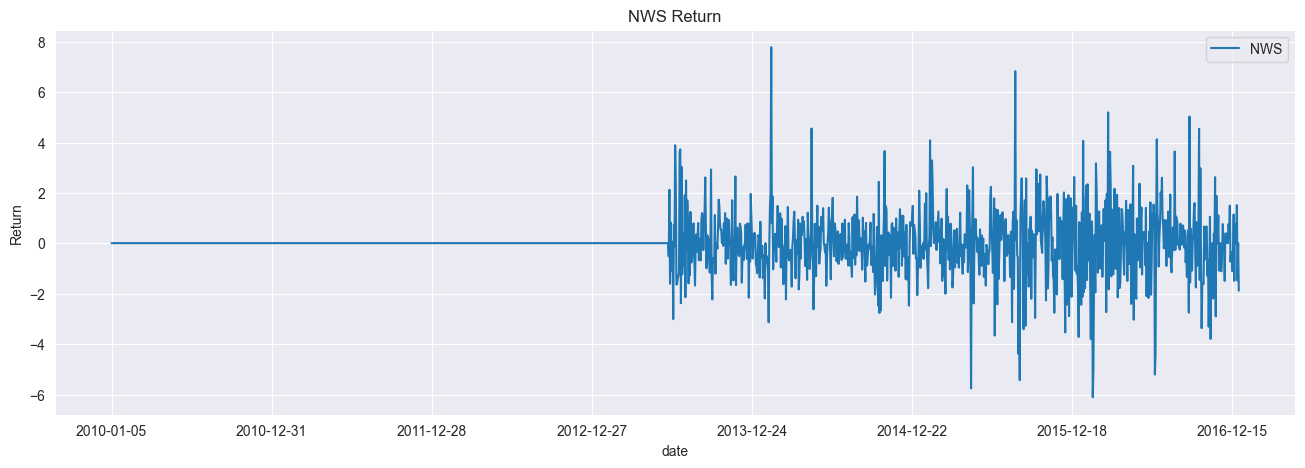

In [77]:
# Visualizing Log Returns for the NYSE closing price of an S&P 500 company
plt.figure(figsize=(16, 5))
plt.title("NWS Return")
plt.ylabel("Return")
rescaled_nyse_df.NWS.plot()
plt.grid(True);
plt.legend()
plt.show()

### 1.1.5. Algorithm Training

In [78]:
# Dividing the dataset into training and testing sets
nyse_percentage = int(len(rescaled_nyse_df) * 0.8)
X_train_nyse = rescaled_nyse_df[:nyse_percentage]
X_test_nyse = rescaled_nyse_df[nyse_percentage:]

X_train_raw_nyse = nyse_dailyReturns[:nyse_percentage]
X_test_raw_nyse = nyse_dailyReturns[nyse_percentage:]


nyse_stock_tickers = rescaled_nyse_df.columns.values
n_tickers_nyse = len(nyse_stock_tickers)

In [80]:
# Training PCA on the rescaled training data
nyse_pca = PCA()
PrincipalComponent = nyse_pca.fit(X_train_nyse)
print(nyse_pca.components_.shape)

(501, 501)


NameError: name 'nyse_pca' is not defined

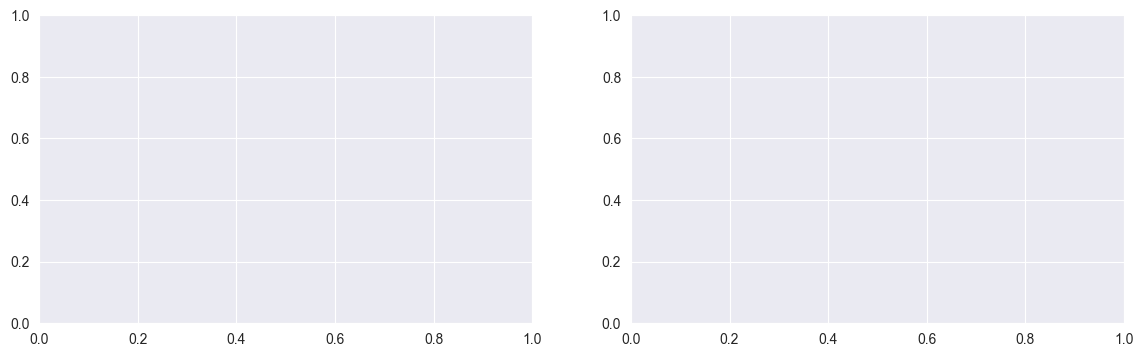

In [23]:
NumEigenvalues=10
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
Series1 = pd.Series(nyse_pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()*100
Series2 = pd.Series(nyse_pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100
Series1.plot.barh(ylim=(0,9), label="woohoo",title="Explained Variance Ratio by Top 10 factors", ax=axes[0]);
Series2.plot(ylim=(0,100),xlim=(0,9),ax=axes[1], title="Cumulative Explained Variance by factor");

# explained_variance
pd.Series(np.cumsum(nyse_pca.explained_variance_ratio_)).to_frame("Explained Variance").head(NumEigenvalues).style.format("{:,.2%}".format)

It appears that the most important factor explains ~42% of the variance in the daily return percentage, with 10 factors explaining ~53% of the variance in the returns of this dataset.

### 1.1.6. Portfolio Weights

In [95]:
def nyse_PCWeights():
    """
    Principal Components (PC) weights for each 501 PCs
    """
    weights = pd.DataFrame()

    for i in range(len(nyse_pca.components_)):
        # Traditional normalisation while considering the sign of each variable and the magnitude of contribution to the PC
        abs_norm = abs(nyse_pca.components_[i]) / sum(abs(nyse_pca.components_[i]))
        col_name = "weights_{}".format(i)
        col_data = [x if y >= 0 else -x for x, y in zip(abs_norm, nyse_pca.components_[i])]
        weights = pd.concat([weights, pd.DataFrame({col_name: col_data})], axis=1)

    weights = weights.values.T
    return weights

nyse_weights = nyse_PCWeights()


In [96]:
nyse_pca.components_[1]

array([ 3.98913336e-02,  6.39102971e-03,  9.92791614e-03,  2.62111827e-02,
       -1.90851831e-02, -1.15332289e-02, -4.03030286e-02,  1.71355855e-02,
        2.64316689e-02,  4.44381629e-02, -1.44194322e-02, -6.37681312e-03,
        1.60126311e-02,  3.89265455e-02, -1.43232817e-01, -1.51936797e-01,
       -5.50833020e-02, -4.22140570e-04,  1.08684365e-02, -8.50811641e-03,
        2.16796066e-02, -6.58404115e-02, -1.08905552e-02, -1.26673289e-02,
        3.63608419e-02,  3.94628013e-02,  1.31118159e-03, -1.56877702e-02,
        2.02116889e-02,  5.65961157e-03,  4.72157469e-02,  3.54663048e-02,
        3.16408492e-02, -2.93218864e-02,  2.76560158e-02, -3.74951183e-02,
        3.71536420e-02,  1.57477870e-02, -1.51184110e-03, -2.37822222e-03,
        2.94803120e-02,  2.81133125e-02,  1.00475031e-02,  2.82007478e-02,
        1.28712685e-02,  1.26085636e-02, -7.99130750e-02,  5.01021006e-02,
        1.53098253e-02, -9.95055529e-02,  3.95201984e-04,  1.73372279e-02,
       -8.75082504e-03,  

In [97]:
nyse_weights[1]

array([ 2.56240002e-03,  4.10524622e-04,  6.37714767e-04,  1.68366231e-03,
       -1.22592727e-03, -7.40831236e-04, -2.58884504e-03,  1.10069583e-03,
        1.69782514e-03,  2.85446335e-03, -9.26225072e-04, -4.09611427e-04,
        1.02856341e-03,  2.50042734e-03, -9.20048891e-03, -9.75958477e-03,
       -3.53824857e-03, -2.71159901e-05,  6.98128628e-04, -5.46514636e-04,
        1.39257877e-03, -4.22922616e-03, -6.99549410e-04, -8.13679587e-04,
        2.33562064e-03,  2.53487346e-03,  8.42230987e-05, -1.00769613e-03,
        1.29828781e-03,  3.63542341e-04,  3.03288007e-03,  2.27816049e-03,
        2.03243425e-03, -1.88347682e-03,  1.77647045e-03, -2.40848032e-03,
        2.38654576e-03,  1.01155128e-03, -9.71123632e-05, -1.52763924e-04,
        1.89365321e-03,  1.80584468e-03,  6.45396376e-04,  1.81146104e-03,
        8.26779546e-04,  8.09904825e-04, -5.13317672e-03,  3.21828357e-03,
        9.83419028e-04, -6.39168981e-03,  2.53856033e-05,  1.11364823e-03,
       -5.62104904e-04,  

## 1.2. PCA on the Dow Jones Industrial Average (DJIA)

### 1.2.1 Importing and Visualising the Data

In [4]:
djia_df = pd.read_csv("Dow_adjcloses_2000_2019.csv", index_col=0)
djia_df.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.522220,NaN,...,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,NaN,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.899860,NaN,...,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,NaN,45.566248,20.907354
2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.781550,NaN,...,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,NaN,44.503437,21.097421
2000-01-06,31.877325,33.959430,2.996290,28.553331,15.459153,22.903343,39.781569,17.210031,24.899860,NaN,...,4.677733,16.972739,32.438168,20.122232,20.998392,5.964159,22.449405,NaN,45.126952,20.527220
2000-01-07,32.509812,34.433913,3.138219,29.382213,15.962182,23.305926,42.128682,18.342270,24.506249,NaN,...,4.677733,18.123166,35.023602,20.922479,21.830687,6.662948,22.282692,NaN,48.535033,21.051805


In [5]:
djia_df.describe()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
count,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,363.000000,...,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,2741.000000,4804.000000,4804.000000
mean,86.768590,49.659383,49.106634,85.481517,56.697445,61.735451,21.652896,24.983814,46.367724,64.897404,...,23.724266,20.736962,49.959573,55.961115,62.208919,64.417705,27.193436,53.323035,50.766604,41.696637
std,53.941623,22.564051,55.020296,79.084514,34.663396,31.713863,10.074094,10.611235,32.733220,5.768347,...,20.987536,7.629779,19.769481,34.644166,32.626864,62.920008,11.973258,37.647367,17.039732,19.937069
min,25.140195,8.713025,0.827607,17.463252,9.247340,17.565805,6.842430,11.698790,11.018313,49.090000,...,2.594833,8.041066,16.203766,13.286538,14.520547,5.175169,11.209926,9.846111,30.747677,17.317194
25%,51.191601,34.078903,3.899987,37.406768,26.335348,31.820217,14.910132,15.419998,22.044106,62.249826,...,8.036966,15.030615,35.413562,29.906759,34.328042,23.498173,17.433612,18.958517,38.062387,27.704467
50%,63.513883,42.274116,23.316182,58.436552,53.047521,56.941779,18.577993,20.563342,29.521283,66.586254,...,14.146826,18.643331,46.734628,39.823712,55.714581,42.923977,21.556066,45.207207,42.782495,32.705776
75%,122.906370,66.815558,84.007174,112.996317,76.487605,91.687905,24.649935,34.927140,75.833054,69.143042,...,36.544526,25.402775,68.134961,80.767355,92.557058,73.170959,38.995728,76.966054,65.076409,58.164790
max,251.980826,112.420728,231.260273,411.110000,166.832487,128.679825,63.698248,50.400000,117.972904,75.261152,...,85.300186,45.841240,98.030000,146.564192,141.279565,286.330000,60.016174,150.524693,107.009557,90.187639


<Axes: title={'center': 'Correlation Matrix'}>

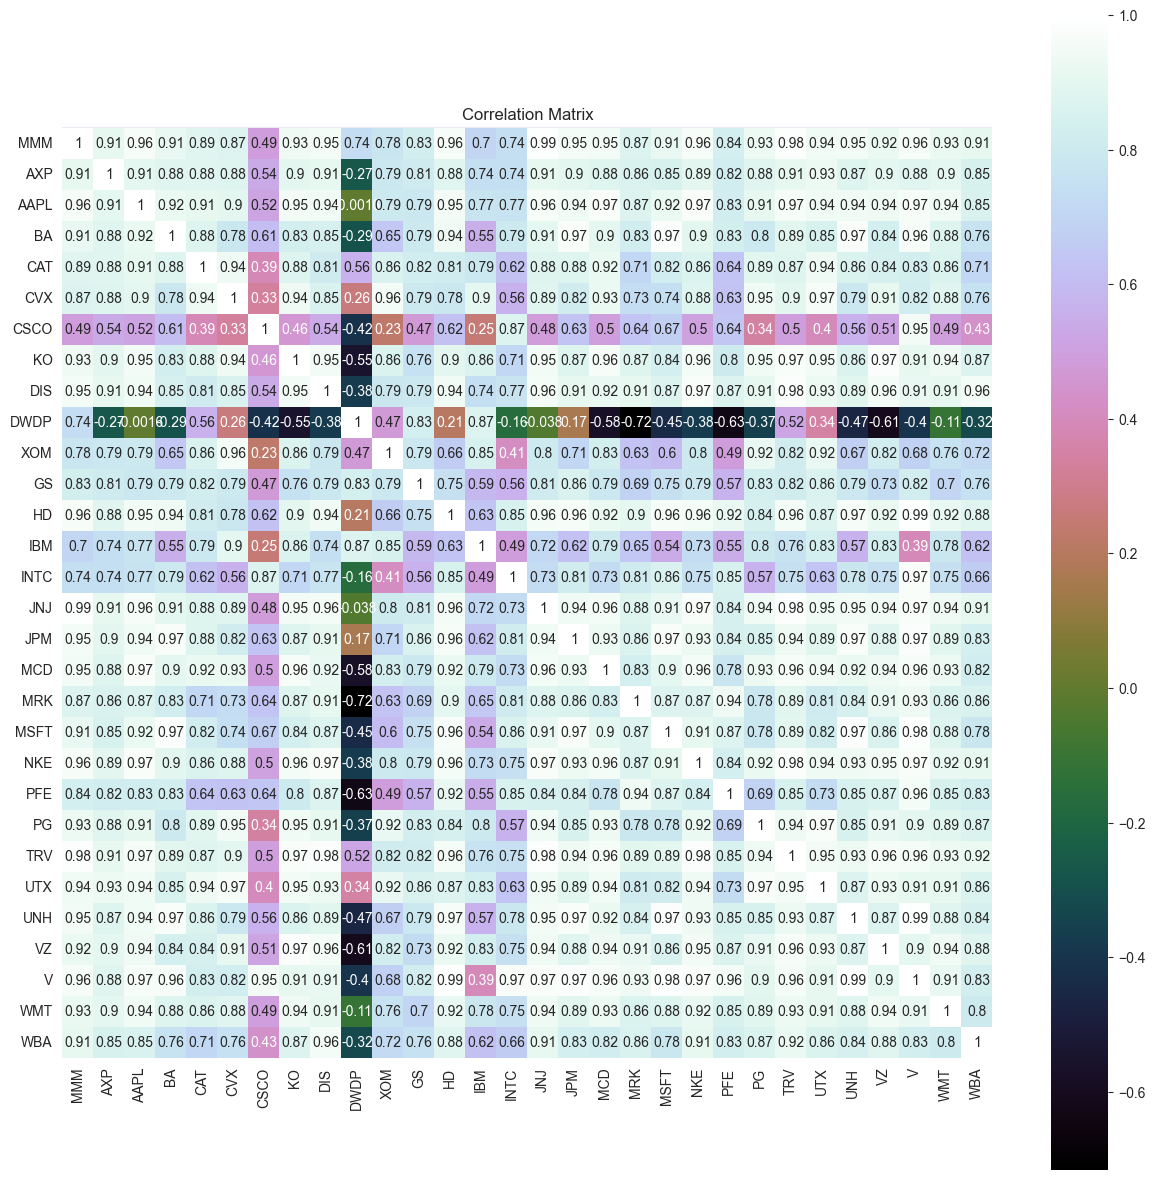

In [6]:
# correlation
djia_correlation = djia_df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(djia_correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

### 1.2.2. Data Preperation

In [9]:
# Checking for any null values and removing the null values
print("Null Values =", djia_df.isnull().values.any())

Null Values = True


In [10]:
# Dropping columns where more than 30% of the rows have NaN values
djia_missing_fractions = djia_df.isnull().mean().sort_values(ascending=False)

djia_missing_fractions.head(10)

drop_list = sorted(list(djia_missing_fractions[djia_missing_fractions > 0.3].index))

djia_df.drop(labels=drop_list, axis=1, inplace=True)
djia_df.shape

(4804, 28)

In [13]:
# Fill the missing values with the next value available in the dataset.
djia_df = djia_df.fillna(method="bfill")

djia_df.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.522220,23.862240,...,38.135101,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.899860,23.405167,...,36.846046,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,45.566248,20.907354
2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.781550,24.569179,...,37.235380,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,44.503437,21.097421
2000-01-06,31.877325,33.959430,2.996290,28.553331,15.459153,22.903343,39.781569,17.210031,24.899860,25.958680,...,35.988857,4.677733,16.972739,32.438168,20.122232,20.998392,5.964159,22.449405,45.126952,20.527220
2000-01-07,32.509812,34.433913,3.138219,29.382213,15.962182,23.305926,42.128682,18.342270,24.506249,25.882501,...,36.459983,4.677733,18.123166,35.023602,20.922479,21.830687,6.662948,22.282692,48.535033,21.051805


In [15]:
# Calculating Daily Linear Returns (%)
djia_dailyReturns = djia_df.pct_change(1)
print(djia_dailyReturns)

#Remove Outliers beyong 3 standard deviation
djia_dailyReturns = djia_dailyReturns[djia_dailyReturns.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]
print(djia_dailyReturns)

                 MMM       AXP      AAPL        BA       CAT       CVX   
Date                                                                     
2000-01-03       NaN       NaN       NaN       NaN       NaN       NaN  \
2000-01-04 -0.039733 -0.037838 -0.084331 -0.001493 -0.012955  0.000000   
2000-01-05  0.050976 -0.005122  0.014634  0.070022  0.037708  0.021643   
2000-01-06  0.058268  0.000000 -0.086538  0.002795  0.036539  0.038741   
2000-01-07  0.019841  0.013972  0.047368  0.029029  0.032539  0.017577   
...              ...       ...       ...       ...       ...       ...   
2019-01-31  0.005169  0.000292  0.007201 -0.005416  0.023442  0.014512   
2019-02-01 -0.005691  0.003505  0.000481  0.004694 -0.016897  0.032447   
2019-02-04  0.005272  0.003493  0.028405  0.024701 -0.000229  0.011574   
2019-02-05  0.004545  0.004641  0.017109  0.033199  0.008557 -0.002171   
2019-02-06  0.007210  0.010202  0.000344  0.002267 -0.011061 -0.005022   

                CSCO        KO       

### 1.2.3. Data Transformation

In [17]:
# Rescaling the data to a standard normal distribution N(0,1)
djia_scaler = StandardScaler().fit(djia_dailyReturns)
rescaled_djia_df = pd.DataFrame(djia_scaler.fit_transform(djia_dailyReturns), columns = djia_dailyReturns.columns, index = djia_dailyReturns.index)
# summarize transformed data
djia_dailyReturns.dropna(how='any', inplace=True)
rescaled_djia_df.dropna(how='any', inplace=True)
rescaled_djia_df.head(2)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-11,-1.713383,0.565603,-2.707674,-1.133045,-1.041247,-0.787063,-1.834413,3.568833,0.725353,0.981056,...,-1.936268,3.666524,-0.172523,1.771791,-0.936081,-1.954189,0.076018,-0.836288,-1.374665,2.942150
2000-01-20,-3.564118,1.077343,3.304005,-1.670108,-2.833568,-0.445782,0.021934,0.987042,-2.415069,-1.897394,...,-0.733208,-1.816361,-1.420880,-2.741513,-0.475716,-1.915682,1.653794,0.241016,-0.987037,-0.035748


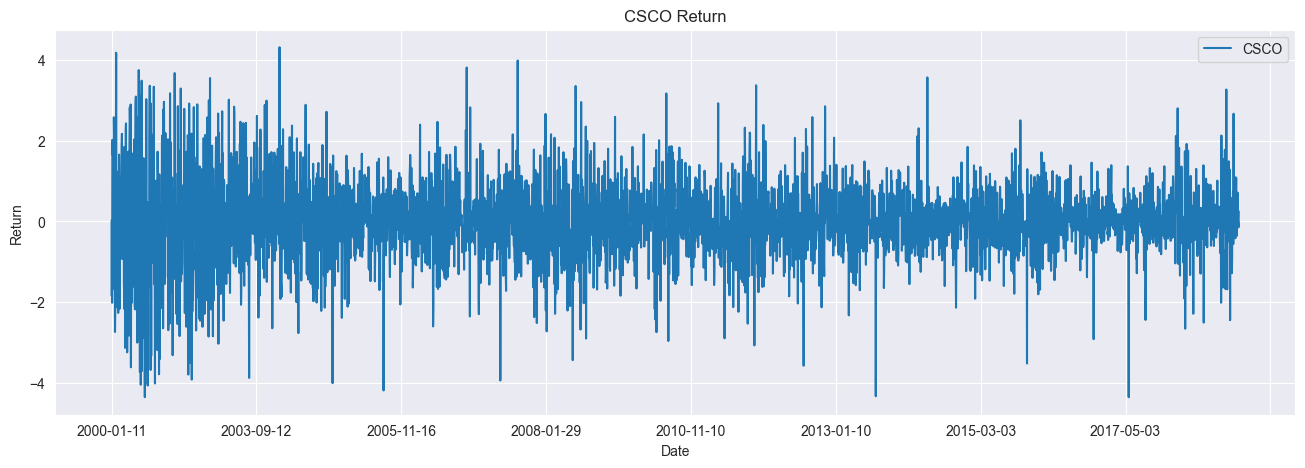

In [18]:
# Visualizing normalised returns for CSCO
plt.figure(figsize=(16, 5))
plt.title("CSCO Return")
plt.ylabel("Return")
rescaled_djia_df.CSCO.plot()
plt.grid(True);
plt.legend()
plt.show()

### 1.2.4 Training the PCA Model

In [19]:
# Dividing the dataset into training and testing sets
djia_percentage = int(len(rescaled_djia_df) * 0.8)
X_train_djia = rescaled_djia_df[:djia_percentage]
X_test_djia = rescaled_djia_df[djia_percentage:]

X_train_raw_djia = djia_dailyReturns[:djia_percentage]
X_test_raw_djia = djia_dailyReturns[djia_percentage:]


djia_stock_tickers = rescaled_djia_df.columns.values
n_tickers_djia = len(djia_stock_tickers)

In [21]:
# Training PCA on the rescaled training data
djia_pca = PCA()
djia_PrincipalComponent = djia_pca.fit(X_train_djia)
print(djia_pca.components_.shape)

(28, 28)


,Explained Variance
0,37.03%
1,42.75%
2,47.10%
3,51.08%
4,54.60%
5,57.74%
6,60.65%
7,63.44%
8,66.18%
9,68.71%


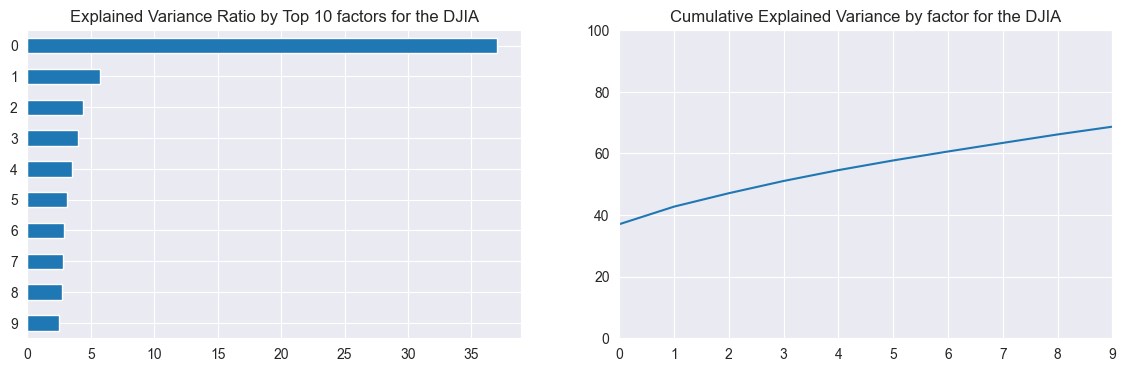

In [22]:
NumEigenvalues=10
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
djia_Series1 = pd.Series(djia_pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()*100
djia_Series2 = pd.Series(djia_pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100
djia_Series1.plot.barh(ylim=(0,9), label="woohoo",title="Explained Variance Ratio by Top 10 factors for the DJIA", ax=axes[0]);
djia_Series2.plot(ylim=(0,100),xlim=(0,9),ax=axes[1], title="Cumulative Explained Variance by factor for the DJIA");

# explained_variance
pd.Series(np.cumsum(djia_pca.explained_variance_ratio_)).to_frame("Explained Variance").head(NumEigenvalues).style.format("{:,.2%}".format)

It appears that the most important factor explains ~37% of the variance in the daily return percentage, with 10 factors explaining ~68% of the variance in the returns of this dataset.

### 1.2.5. Portfolio Weights

In [25]:
def djia_PCWeights():
    """
    Principal Components (PC) weights for each 28 PCs
    """
    weights = pd.DataFrame()

    for i in range(len(djia_pca.components_)):
        # Traditional normalisation while considering the sign of each variable and the magnitude of contribution to the PC
        abs_norm = abs(djia_pca.components_[i]) / sum(abs(djia_pca.components_[i]))
        col_name = "weights_{}".format(i)
        col_data = [x if y >= 0 else -x for x, y in zip(abs_norm, djia_pca.components_[i])]
        weights = pd.concat([weights, pd.DataFrame({col_name: col_data})], axis=1)

    weights = weights.values.T
    return weights

djia_weights = djia_PCWeights()

In [27]:
djia_weights[1]

array([-0.00552541,  0.0208992 ,  0.07624878,  0.00284894,  0.01937012,
       -0.02938766,  0.08190582, -0.05634955,  0.02078034, -0.0343598 ,
        0.0375632 ,  0.00267888,  0.04128112,  0.075951  , -0.07947935,
        0.02916365, -0.02470113, -0.06947511,  0.04806661,  0.00054936,
       -0.05294305, -0.06828697, -0.01069661,  0.00952642, -0.03838767,
       -0.01845151, -0.01697042, -0.02815231])

In [29]:
djia_pca.components_[1]

array([-0.02391164,  0.09044288,  0.32997237,  0.01232901,  0.08382568,
       -0.12717731,  0.35445366, -0.24385695,  0.08992852, -0.14869462,
        0.16255761,  0.01159305,  0.17864717,  0.3286837 , -0.34395292,
        0.12620789, -0.10689601, -0.30065882,  0.20801189,  0.00237741,
       -0.22911505, -0.29551704, -0.0462904 ,  0.0412263 , -0.16612555,
       -0.07985032, -0.07344079, -0.12183127])